In [50]:
#“I certify that this assignment represents my work. I have not used any unauthorized or unacknowledged assistance
#or sources in completing it, including free or commercial systems or services offered on the internet.”

In [216]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#To print color in matplotlib
# Set color 
c = '#97C1A9'
k='white'
# Create dictionary of keyword aruments to pass to plt.boxplot
red_dict =  {'patch_artist': True,
             'boxprops': dict(color=c, facecolor=c),
             'capprops': dict(color=c),
             'flierprops': dict(color=c, markeredgecolor=c),
             'medianprops': dict(color=k),
             'whiskerprops': dict(color=c)}



In [217]:
#Printing head of data
sales_data=pd.read_csv("supermarket_sales.csv")
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [218]:
#Info to get dtypes
sales_data.info()

#Date field is an object, can be converted to hours, days and months for better insights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [219]:
#Description of data 
sales_data.describe()

#Mean and median are not too different in the features, we could assume:
#there are not many outlier data points pulling the mean to the extremes

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


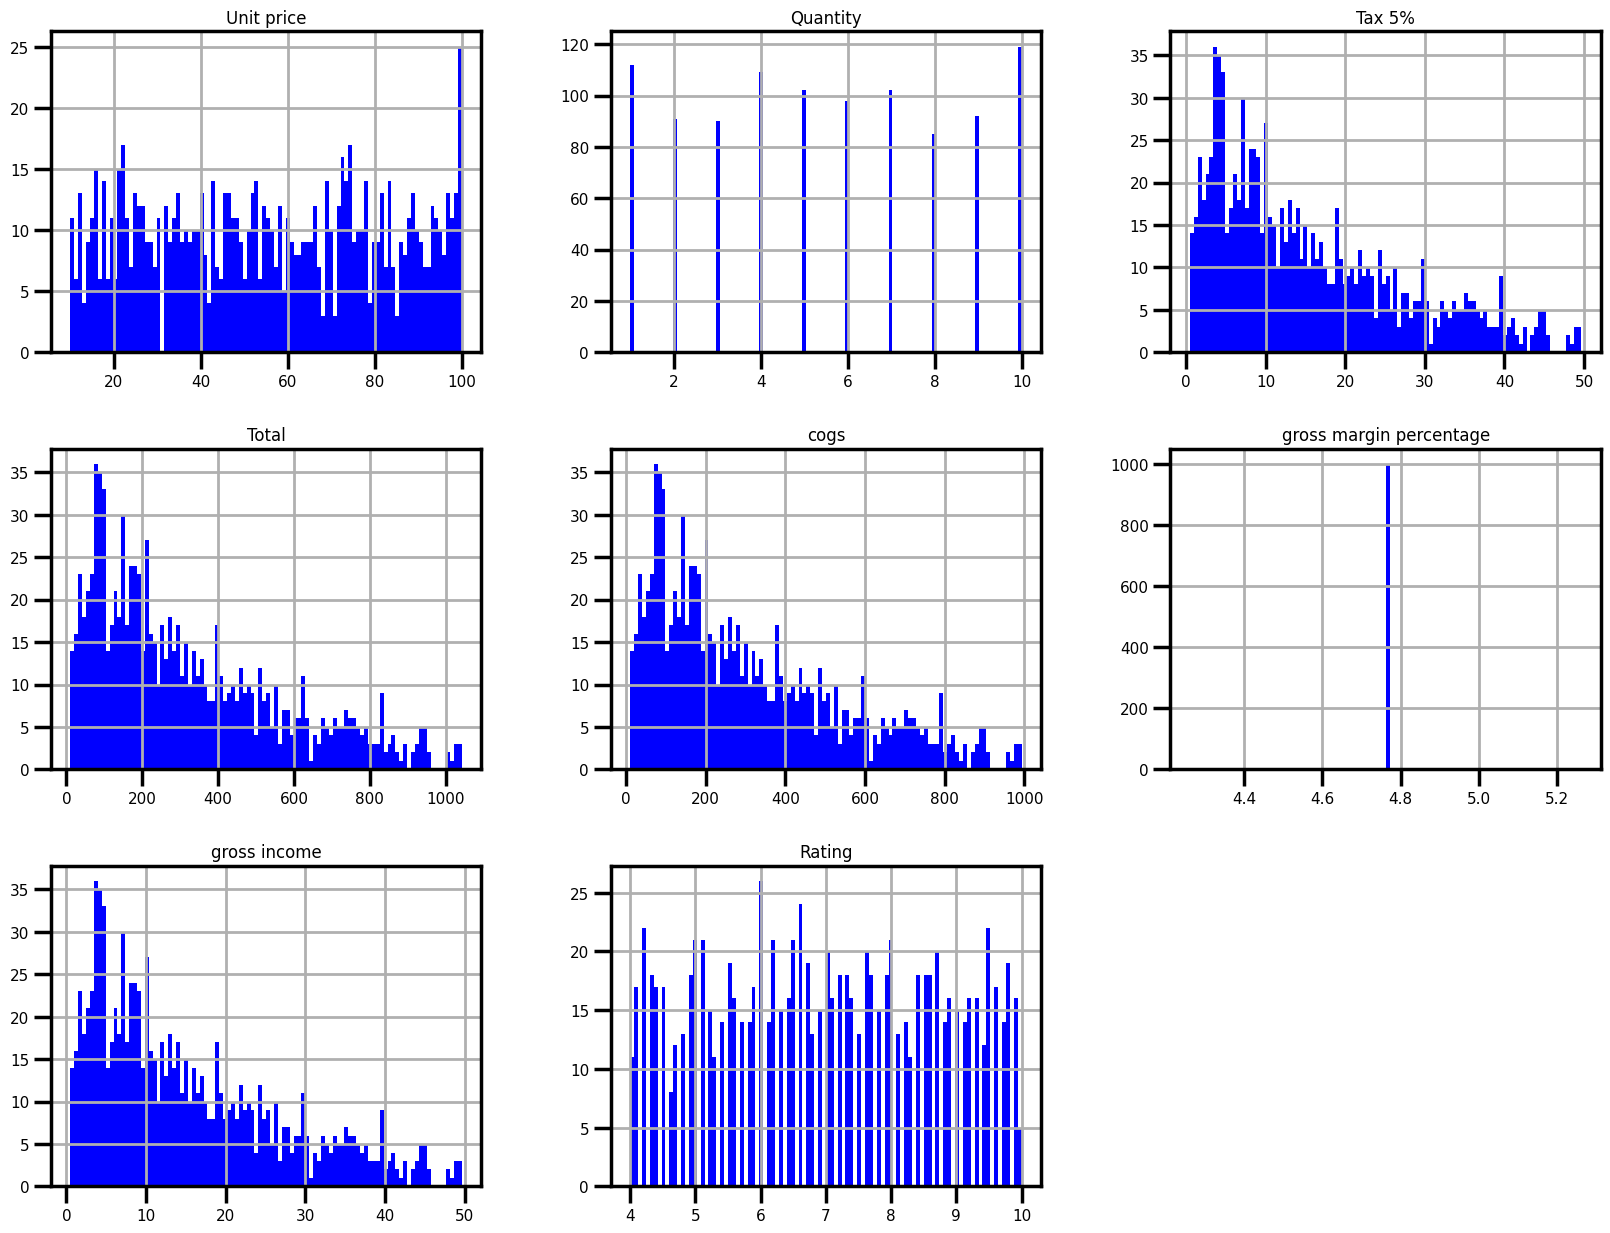

In [55]:
sales_data.hist(bins=100,figsize=(20,15))
plt.grid()
plt.show()

In [56]:
sales_data.shape
#1000 rows and 17 columns

(1000, 17)

In [220]:
sales_data["Branch"].value_counts()

#There are three branches of the supermarket
#A B and C - A has highest frequency


A    340
B    332
C    328
Name: Branch, dtype: int64

In [58]:
sales_data["City"].value_counts()


#The supermarket is located in three cities
#Yangon, Mandalay and Naypyitaw - with similar number of branches
#Yangon (A) has highest number of branches followed by Mandalay(B) then Naypyitaw (C)

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [59]:
sales_data["Customer type"].value_counts()

#There are 501 members and 499 normal customers

Member    501
Normal    499
Name: Customer type, dtype: int64

In [60]:
sales_data["Gender"].value_counts()

#There are 501 females customers and 499 males customers

Female    501
Male      499
Name: Gender, dtype: int64

In [61]:
sales_data["Product line"].value_counts()

#There are 6 categories of product lines
#Fashion accessories is the most frequently occuring category
#Health and Beauty is the least frequently occuring category

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [62]:
sales_data["Payment"].value_counts()

#Three types of payment modes
#Ewallet and Cash most frequently used payment mode
#Credit card least frequently payment mode

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [63]:
#Missing Values
sales_data.isna().sum()

#There is no missing values in the data

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [64]:
sales_data.isnull().sum()

#There is no missing values in the data

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [65]:
#Duplicate values
sales_data.duplicated().sum()

#There is no duplicate values in the data

0

<AxesSubplot: >

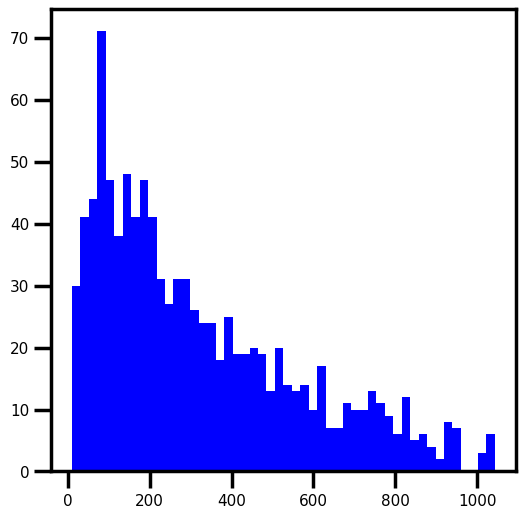

In [66]:
#Histogram of total
sales_data["Total"].hist(bins=50,figsize=(6,6),grid=False)
#Right skewed distribution of Total price with tax
#There are few data points above 900$

In [67]:
#Checking extreme outlier point
#Checking if any data point falls
#above 99th percentile and below 1st percentile

out_sales = sales_data[(sales_data['Total'] > (sales_data['Total'].quantile(0.99))) & (sales_data['Total'] < (sales_data['Total'].quantile(0.1)))]
out_sales

#No such outliers


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [68]:
#Output the sales data that is above 900$ of purchase
sales_above_900 = sales_data[sales_data['Total']>900]
sales_above_900.head()
#26 Transactions of sales data greater than 900$

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
70,393-65-2792,C,Naypyitaw,Normal,Male,Food and beverages,89.48,10,44.740,939.540,1/6/2019,12:46,Credit card,894.80,4.761905,44.740,9.6
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.935,922.635,3/29/2019,10:25,Ewallet,878.70,4.761905,43.935,5.1
105,704-48-3927,A,Yangon,Member,Male,Electronic accessories,88.67,10,44.335,931.035,1/12/2019,14:50,Ewallet,886.70,4.761905,44.335,7.3
122,219-22-9386,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.982,944.622,3/9/2019,17:26,Credit card,899.64,4.761905,44.982,4.2
140,731-81-9469,C,Naypyitaw,Member,Female,Sports and travel,89.80,10,44.900,942.900,1/23/2019,13:00,Credit card,898.00,4.761905,44.900,5.4


In [69]:
sales_above_900['Product line'].sort_values(ascending=False).head(12)

#Most frequently bought product line above 900$ is Sports and travel
#Next follows home & lifestyle and health & beauty.
#Marketing more for these three product lines could lead to more gross income. 

357     Sports and travel
982     Sports and travel
122     Sports and travel
140     Sports and travel
529     Sports and travel
435     Sports and travel
429    Home and lifestyle
792    Home and lifestyle
699    Home and lifestyle
996    Home and lifestyle
166    Home and lifestyle
96      Health and beauty
Name: Product line, dtype: object

<AxesSubplot: title={'center': 'Total'}, xlabel='Gender'>

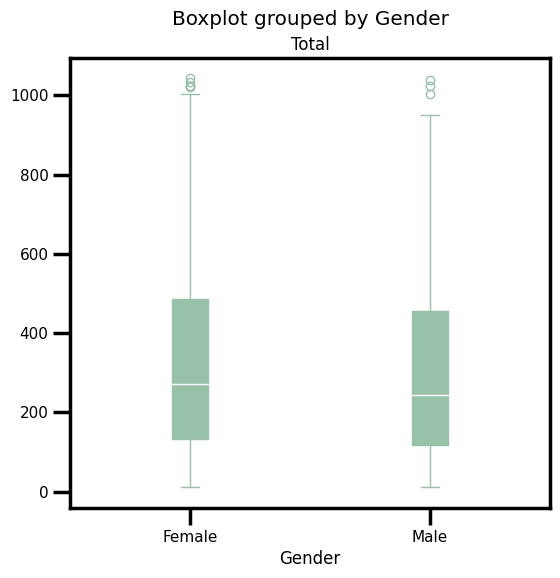

In [70]:
#Do females purchase more than males
sales_data.boxplot(column=["Total"],by="Gender",figsize=(6,6),grid=False,**red_dict)

#Gender boxplot against Total price
#Male median expenditure falls around 225$ and female falls around 250$
#There are few exceptions of outliers present in this observation like seen above
#Few male and female spend above 1000$ as well

In [71]:
#Looking at data points above 1000$ of sale
sales_data[sales_data['Total']>1000]

#9 rows of data that has total above 1000$
#Most of the data of sales above 1000$ occurs in C (Naypyitaw) Branch

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


<AxesSubplot: title={'center': 'Total'}, xlabel='Product line'>

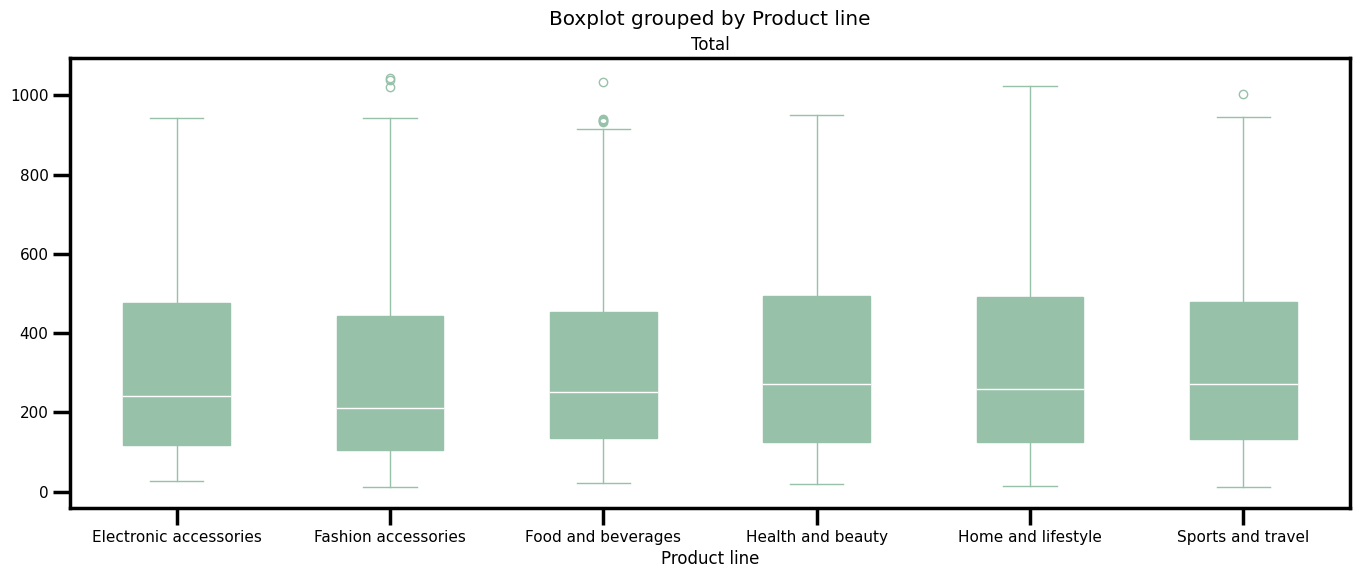

In [72]:
#Which product line contribute to most Total sales
sales_data.boxplot(column=["Total"],by="Product line",figsize=(16,6),grid=False,**red_dict)

#The median sales of Health and Beauty is the highest among all products
#However, Home and lifestyle has the highest mean

In [73]:
#Finding sales of each product line by median -
grouped_product = sales_data.groupby('Product line')
grouped_product['Total'].agg(np.median).sort_values(ascending=False)

#Health and beauty has the highest median of Total sales, followed by
#Sports & Travel and Home & lifestyle

Product line
Health and beauty         272.30700
Sports and travel         270.93150
Home and lifestyle        258.18975
Food and beverages        252.48825
Electronic accessories    241.21650
Fashion accessories       211.64850
Name: Total, dtype: float64

In [74]:
#Finding sales of each product line by mean -
grouped_product = sales_data.groupby('Product line')
grouped_product['Total'].agg(np.mean).sort_values(ascending=False)

#Home & lifestyle has the highest mean of Total sales, followed by
#Sports & Travel and Health and beauty

Product line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Fashion accessories       305.089298
Name: Total, dtype: float64

In [75]:
#Preprocessing date

#Converting Date object to Series of dataetime64 data type
sales_data['new_Date'] = pd.to_datetime(sales_data['Date'])
sales_data['new_Date'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: new_Date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [76]:
#Converting Time object to Series of dataetime64 data type

sales_data['new_time'] = pd.to_datetime(sales_data['Time'])
sales_data['new_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: new_time
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [77]:
#Adding new features derived from date

#Hour - Hour of the day - 1,2,3...
sales_data['hour'] = (sales_data['new_time']).dt.hour

#Day name - Day of the week - Monday, Tuesday...
sales_data['day'] = (sales_data['new_Date']).dt.day_name()

#Month name - January, February...
sales_data['month'] = (sales_data['new_Date']).dt.month_name()

#If sales day falls on weekend - Dummied to 1 and 0
sales_data['weekend'] = np.where(sales_data['day'].isin(['Saturday','Sunday']),1,0)

sales_data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,new_Date,new_time,hour,day,month,weekend
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019-01-05,2023-02-05 13:08:00,13,Saturday,January,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019-03-08,2023-02-05 10:29:00,10,Friday,March,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019-03-03,2023-02-05 13:23:00,13,Sunday,March,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019-01-27,2023-02-05 20:33:00,20,Sunday,January,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019-02-08,2023-02-05 10:37:00,10,Friday,February,0


In [78]:
#Does weekend have an effect on sales -
is_weekend = sales_data.groupby('weekend')
is_weekend['Total'].agg(np.mean).sort_values(ascending=False)

#The mean sales is only higher by 20$ on weekends compared to weekdays

weekend
1    338.648828
0    316.341461
Name: Total, dtype: float64

In [79]:
# What are the peak hours of sales in the supermarkets overall
print("Hours : \n",sales_data["hour"].value_counts())
#11 unique values of time
# The peak time of sales is usually at 19 hours and the least sales is at 17 hours

# Which days see the most sales in a week?
print("Days : \n",sales_data["day"].value_counts())
#7 days data exists - Saturdays and Tuesdays have the highest frequency
#It could help to employ more people for stocking and cashing out on Saturdays and Tuesdays
#Mondays have the least sales

# Which month has the highest sales within the three months
print("Months : \n",sales_data["month"].value_counts())
#3 months data exists - 
#January has the highest frequency out of the three months


Hours : 
 19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: hour, dtype: int64
Days : 
 Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: day, dtype: int64
Months : 
 January     352
March       345
February    303
Name: month, dtype: int64


<AxesSubplot: title={'center': 'Total'}, xlabel='day'>

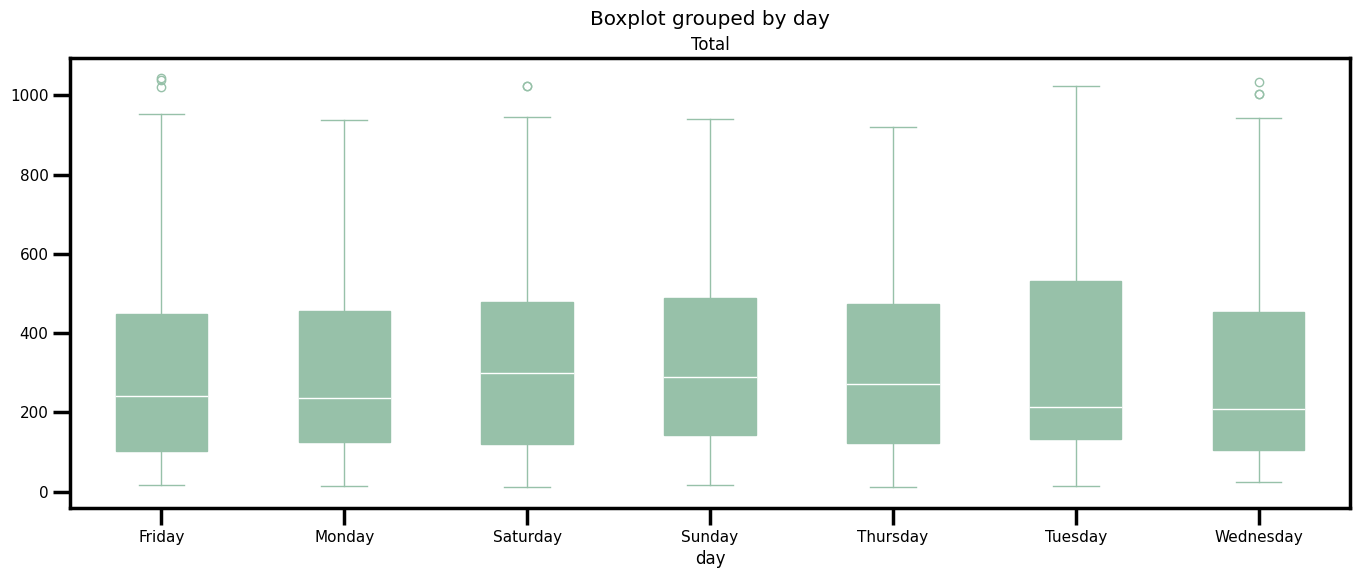

In [80]:
#Day of the week
sales_data.boxplot(column=["Total"],by="day",figsize=(16,6),grid=False,**red_dict)
#Saturdays and Tuesdays have the highest frequency
#It could help to employ more people for stocking and cashing out on Saturdays and Tuesdays
#Mondays have the least sales

<AxesSubplot: title={'center': 'Total'}, xlabel='month'>

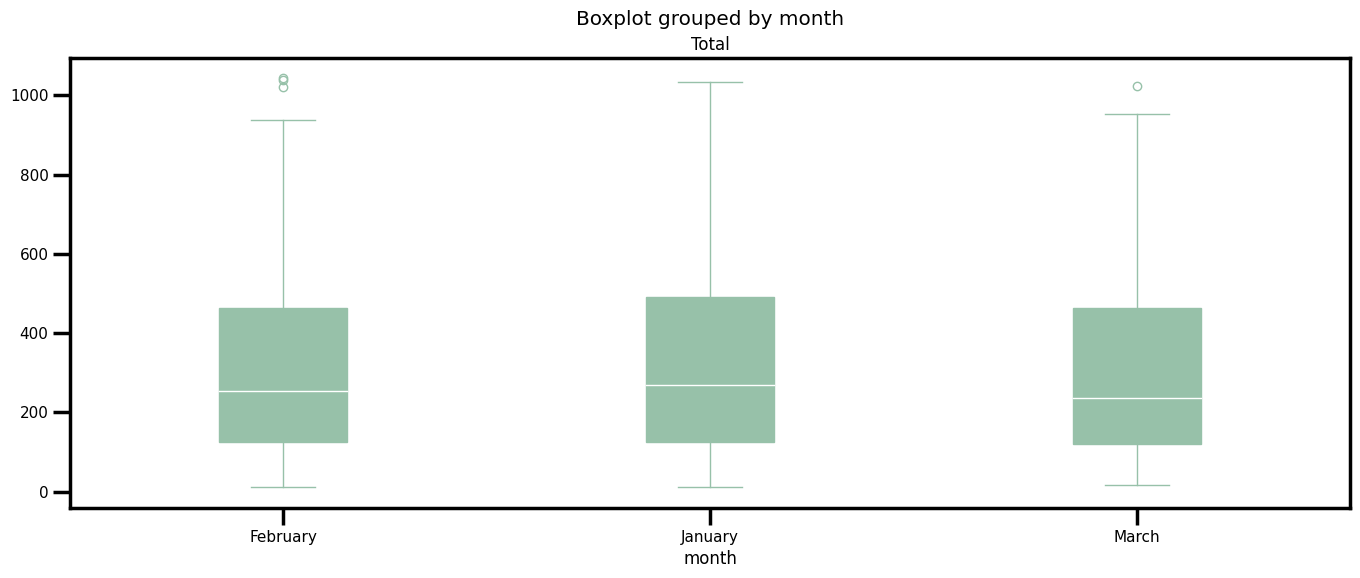

In [81]:
#Monthly sales
sales_data.boxplot(column=["Total"],by="month",figsize=(16,6),grid=False,**red_dict)
#January has the highest frequency of the three months

<AxesSubplot: title={'center': 'Total'}, xlabel='hour'>

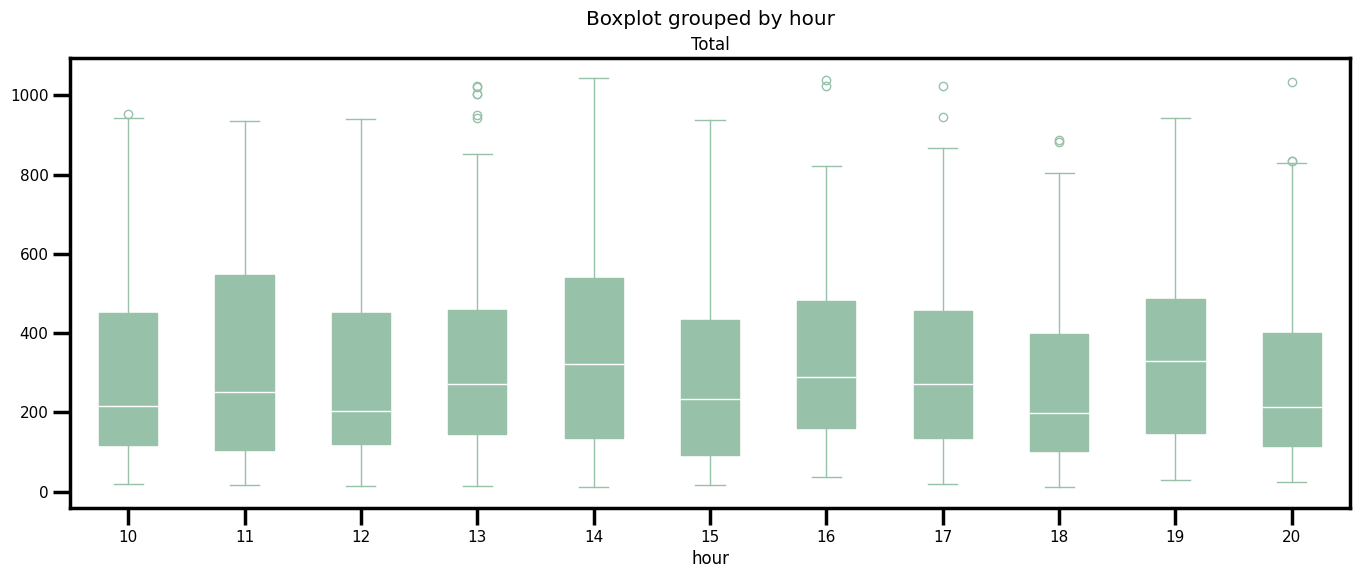

In [82]:
#Day of the week
sales_data.boxplot(column=["Total"],by="hour",figsize=(16,6),grid=False,**red_dict)
# The peak time of sales is usually at 19 hours and the least sales is at 17 hours

<AxesSubplot: xlabel='hour', ylabel='Total'>

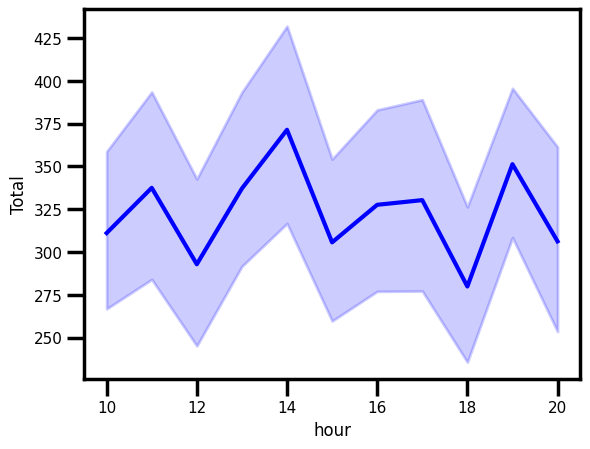

In [83]:
#Sales data by the hour
sns.lineplot(
    data=sales_data, x="hour", y="Total"
)

<AxesSubplot: title={'center': 'Quantity'}, xlabel='Product line'>

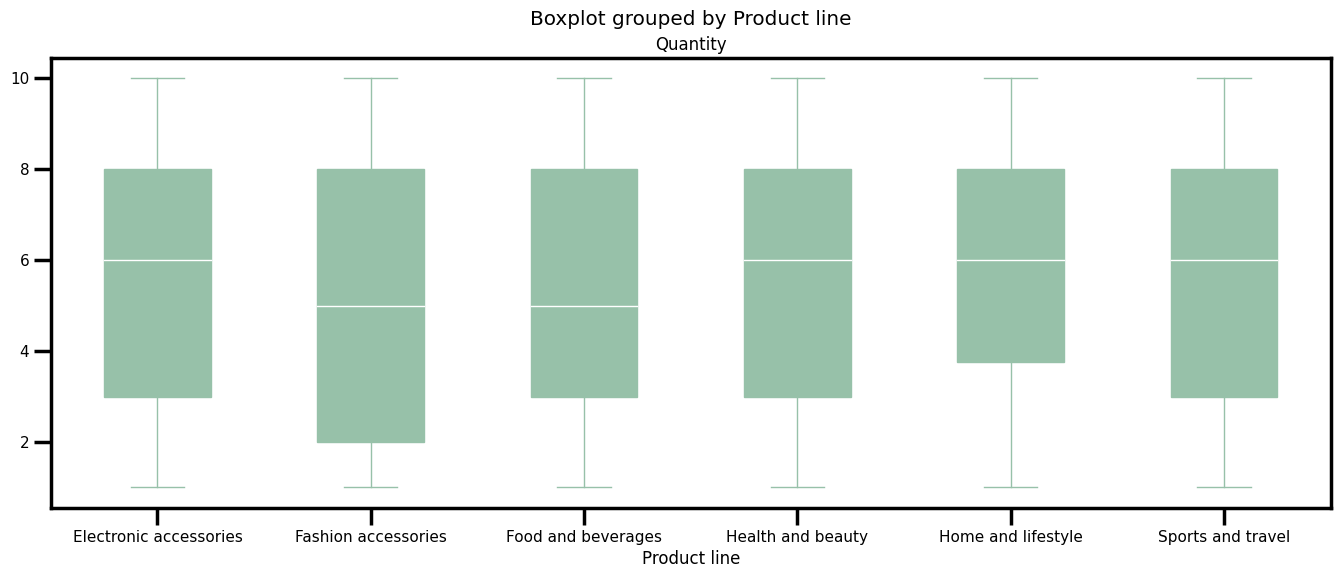

In [84]:
#Which product line is bought in more quantity
sales_data.boxplot(column=["Quantity"],by="Product line",figsize=(16,6),grid=False,**red_dict)
#Health&Beauty, Electronic accessories, Home&Lifestyle and Sport&Travel have higher median than the rest

In [85]:
#Which branch makes the most sale? What is the gross income distribution?
sales_data.groupby('Branch').agg('mean')

#There is no significant difference between the three branches - Total, Gross income and Gross income percentages
#C branch makes slightly highest mean among the three
#C also imposes highest tax percentage

/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_40096/140631881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_data.groupby('Branch').agg('mean')


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,hour,weekend
Branch,,,,,,,,,,
A,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059,14.667647,0.300000
B,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072,15.147590,0.286145
C,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866,14.920732,0.304878


In [86]:
sales_data.groupby('Branch').agg('sum')
#There is no significant difference between the three branches - Total, Gross income and Gross income percentages
#C branch makes slightly highest mean among the three
#C also imposes highest tax percentage

/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_40096/211392365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_data.groupby('Branch').agg('sum')


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,hour,weekend
Branch,,,,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,4987,102
B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,5029,95
C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,4894,100


<AxesSubplot: title={'center': 'gross income'}, xlabel='Branch'>

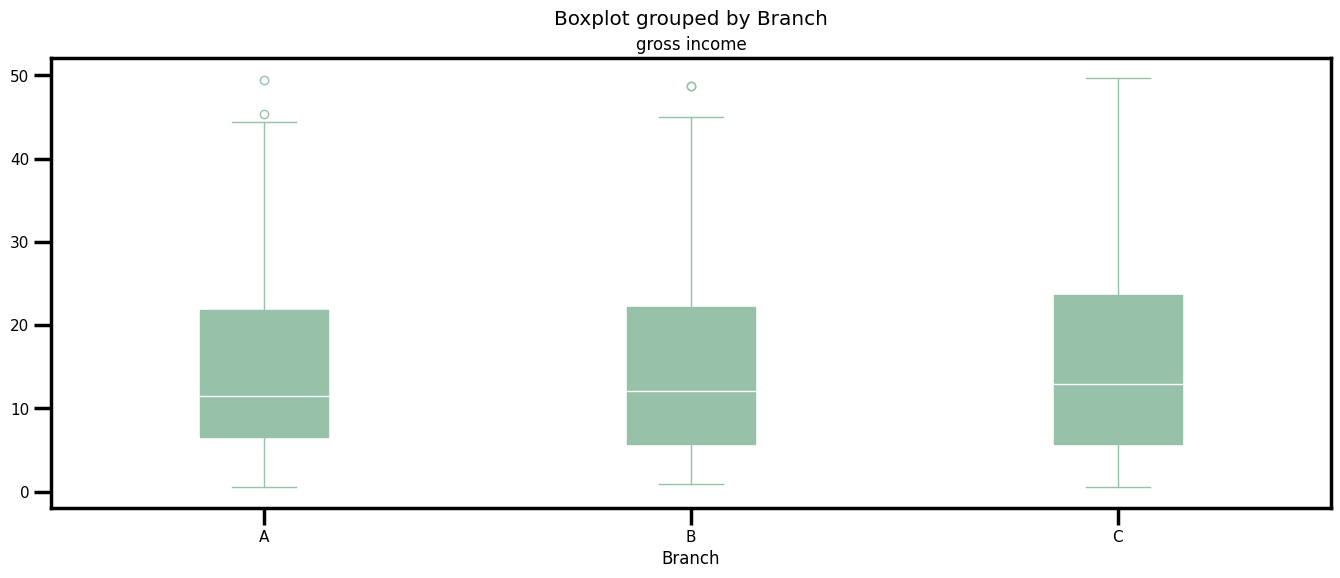

In [87]:
#How does gross income vary between the three branches
sales_data.boxplot(column=["gross income"],by="Branch",figsize=(16,6),grid=False,**red_dict)
                   

#Branch C makes the highest gross income

<AxesSubplot: title={'center': 'Rating'}, xlabel='Branch'>

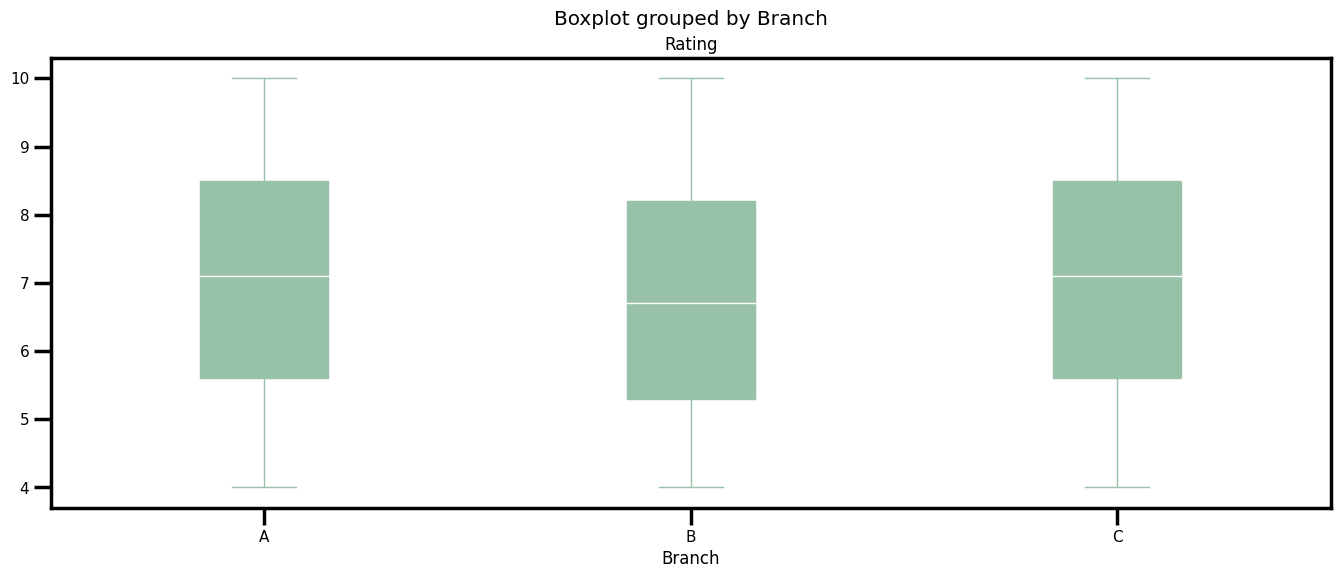

In [88]:
#How does rating vary between the three branches
sales_data.boxplot(column=["Rating"],by="Branch",figsize=(16,6),grid=False,**red_dict)
                   

#Branches A and C have better rating than B
#Branch A has highest rating

In [89]:
#Do members purchase more than normal customers?
sales_data.groupby('Customer type').agg('sum')

#Members tend to purchase more than normal members, while normal members give more rating.

/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_40096/2101026622.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_data.groupby('Customer type').agg('sum')


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,hour,weekend
Customer type,,,,,,,,,,
Member,28159.70,2785,7820.164,164223.444,156403.28,2385.714286,7820.164,3477.1,7500,148
Normal,27512.43,2725,7559.205,158743.305,151184.10,2376.190476,7559.205,3495.6,7410,149


In [90]:
#Which gender make the most number of members and normal 
member_pivot = np.round(pd.pivot_table(sales_data, values='Total', 
                                index='Customer type', 
                                columns='Gender', 
                                aggfunc='count'),2)
member_pivot
#The number of members is higher in females

Gender,Female,Male
Customer type,,
Member,261,240
Normal,240,259


In [91]:
#Do females purchase more than males?
sales_data.groupby('Gender').agg('sum')

#Females contribute to more sales and profit than male customers

/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_40096/555700638.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_data.groupby('Gender').agg('sum')


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,hour,weekend
Gender,,,,,,,,,,
Female,27687.24,2869,7994.425,167882.925,159888.50,2385.714286,7994.425,3489.2,7336,154
Male,27984.89,2641,7384.944,155083.824,147698.88,2376.190476,7384.944,3483.5,7574,143


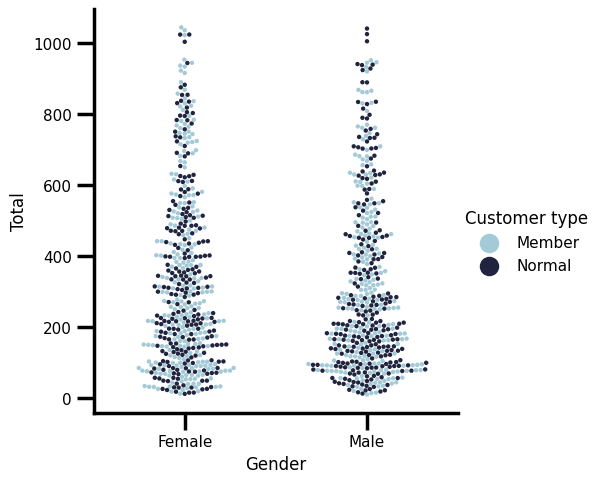

In [92]:
#Lets visualise Sales in different genders by customer type
ax = sns.catplot(x="Gender", y="Total", data=sales_data, s=10,kind="swarm",hue="Customer type",palette="ch:r=-.19,l=.75")


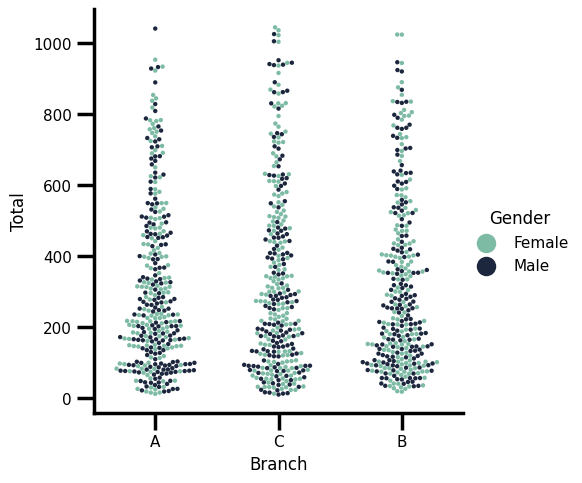

In [93]:
#Lets visualise Sales in different branches by gender
ax = sns.catplot(x="Branch", y="Total", data=sales_data, s=10,kind="swarm",hue="Gender",palette="ch:r=-.39,l=.65")

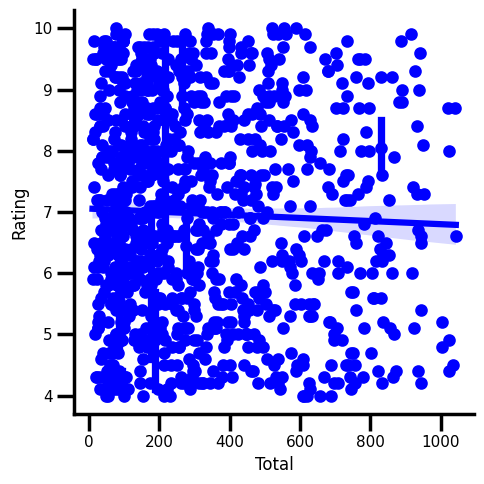

In [94]:
#Is there any relationship between Rating and Total sales
sns.lmplot(
    data=sales_data, x="Total", y="Rating",x_estimator=np.mean
)
#There is no significant linear relationship between Rating and Total sales
#Shopping experience doesnot seem to correlate with sales

In [95]:
#Which genders tend to purchase which categories of products?

pivot = np.round(pd.pivot_table(sales_data, values='Total', 
                                index='Product line', 
                                columns='Gender', 
                                aggfunc=np.mean),2)
pivot

#Comparing the mean sales of each category by gender:
#Food and bevarages are purchased significantly more by females than males
#Health & Beauty products are purchased significantly more by males than females
#Home & Lifestyle are purchased significantly more by females than males


Gender,Female,Male
Product line,,
Electronic accessories,322.64,316.69
Fashion accessories,317.06,291.08
Food and beverages,368.57,273.50
Health and beauty,290.02,348.10
Home and lifestyle,380.21,294.14
Sports and travel,324.71,340.36


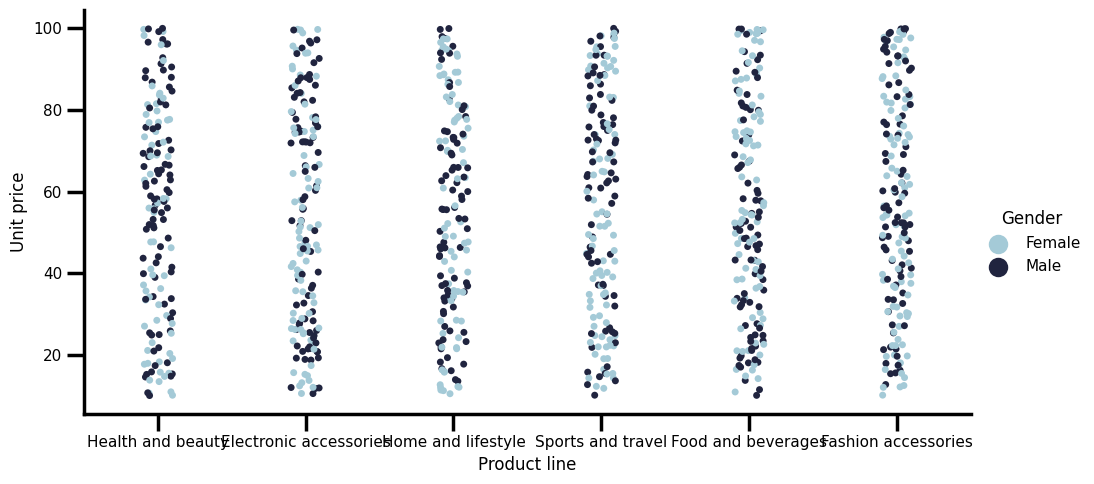

In [96]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=sales_data,aspect=2,palette="ch:r=-.19,l=.75")


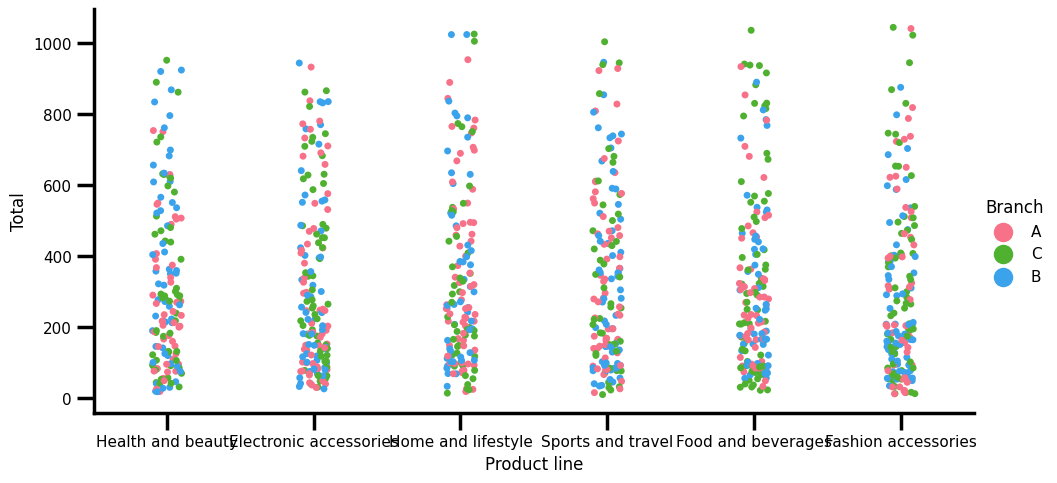

In [97]:
#Which product lines are sold most in which branches
sns.catplot(x='Product line',y='Total',hue='Branch',data=sales_data,aspect=2)


In [98]:
#Descriptive statistics of product line 
pivot2 = np.round(pd.pivot_table(sales_data, values='Total', 
                                index='Product line', 
                                aggfunc=('count', 'mean','median','sum')),2)
pivot2

#Home and Lifestyle has the highest mean 
#Food and beverages has the highest sum

,count,mean,median,sum
Product line,,,,
Electronic accessories,170,319.63,241.22,54337.53
Fashion accessories,178,305.09,211.65,54305.90
Food and beverages,174,322.67,252.49,56144.84
Health and beauty,152,323.64,272.31,49193.74
Home and lifestyle,160,336.64,258.19,53861.91
Sports and travel,166,332.07,270.93,55122.83


In [99]:
#Highest unit price and lowest unit price and mean median of each product line
pivot3 = np.round(pd.pivot_table(sales_data, values='Unit price', 
                                index='Product line', 
                                aggfunc=('count', 'mean','median','sum')),2)
pivot3
#Sports and travel products have the highest median unit price

,count,mean,median,sum
Product line,,,,
Electronic accessories,170,53.55,51.50,9103.77
Fashion accessories,178,57.15,55.09,10173.35
Food and beverages,174,56.01,54.00,9745.54
Health and beauty,152,54.85,57.40,8337.88
Home and lifestyle,160,55.32,55.59,8850.71
Sports and travel,166,56.99,58.65,9460.88


In [100]:
#tax according to product line
#Highest unit price and lowest unit price and mean median of each product line
pivot4 = np.round(pd.pivot_table(sales_data, values='Tax 5%', 
                                index='Product line', 
                                aggfunc=('count', 'mean','median','sum')),2)
pivot4
#Health and beauty products have the highest median unit price of tax 5%

,count,mean,median,sum
Product line,,,,
Electronic accessories,170,15.22,11.49,2587.50
Fashion accessories,178,14.53,10.08,2586.00
Food and beverages,174,15.37,12.02,2673.56
Health and beauty,152,15.41,12.97,2342.56
Home and lifestyle,160,16.03,12.29,2564.85
Sports and travel,166,15.81,12.90,2624.90


In [101]:
#Profit according to product line
#tax according to product line
#Highest unit price and lowest unit price and mean median of each product line
pivot5 = np.round(pd.pivot_table(sales_data, values='gross income', 
                                index='Product line', 
                                aggfunc=('sum')),2)
pivot5
#Food and beverages products have the highest gross income

,gross income
Product line,
Electronic accessories,2587.50
Fashion accessories,2586.00
Food and beverages,2673.56
Health and beauty,2342.56
Home and lifestyle,2564.85
Sports and travel,2624.90


In [102]:
#Rating by gender
pivot6 = np.round(pd.pivot_table(sales_data, values='Rating', 
                                index='Gender', 
                                aggfunc=('mean')),2)
pivot6
#The rating between male and female is approximately equal

,Rating
Gender,
Female,6.96
Male,6.98


/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_40096/2831392000.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.catplot(x="Payment", y="Total", data=sales_data, s=10,kind="swarm",palette="ch:r=-.69,l=.75")


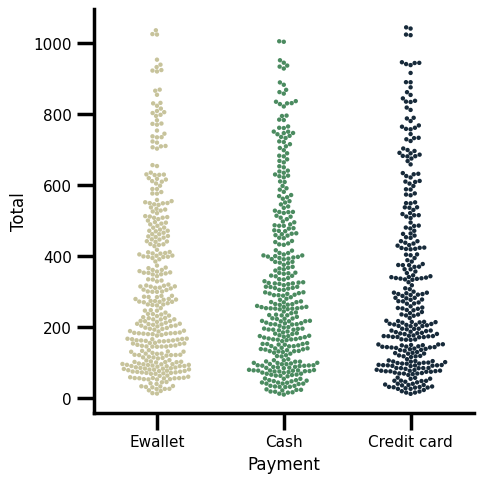

In [103]:
#Does Payment type change with total
ax = sns.catplot(x="Payment", y="Total", data=sales_data, s=10,kind="swarm",palette="ch:r=-.69,l=.75")

/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_40096/568054845.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_data.corr(),annot=True,cmap="YlGnBu")


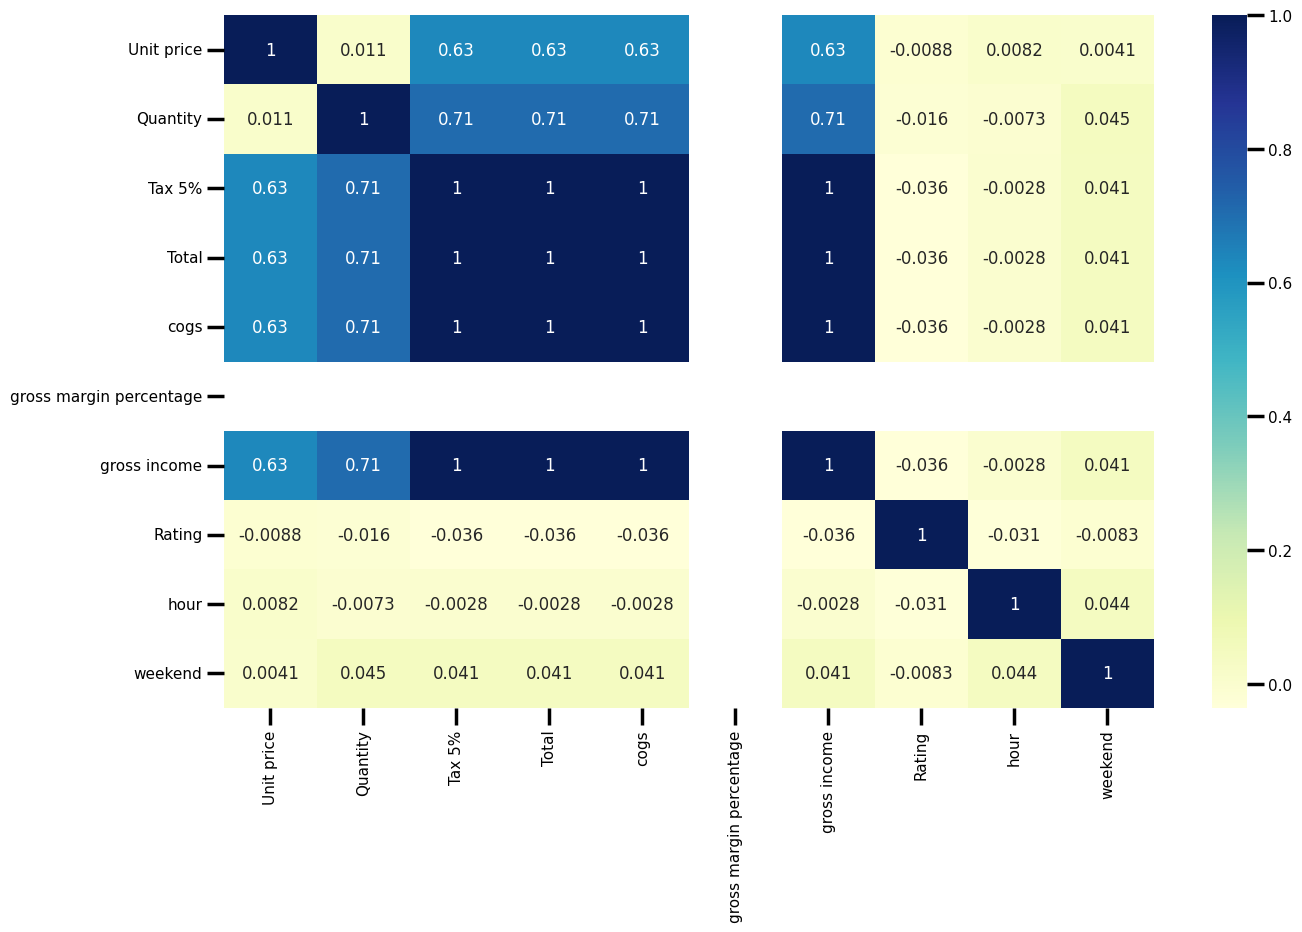

In [104]:
#Correlation heatmap
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(sales_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

#Only the obvious features show correlations like :
#Unit price, tax, Quantity and Gross income
#Other features doesnot show significant correlation

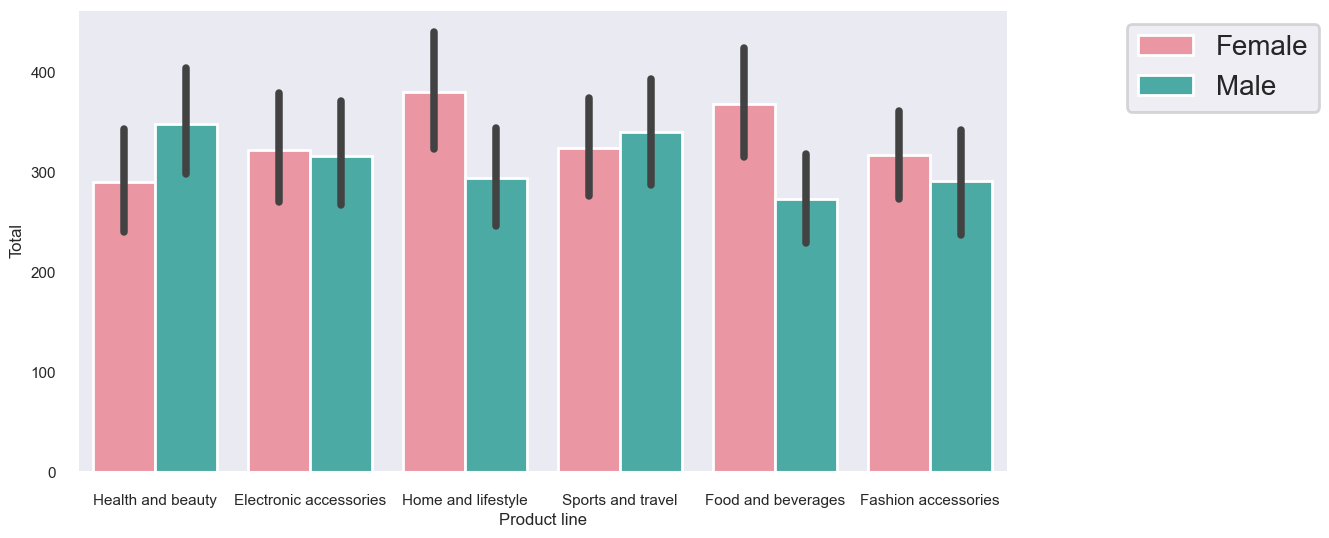

In [112]:
#Stacked bar 

import seaborn as sns
import matplotlib as mpl
sns.set_style("dark")

mpl.rcParams['font.size'] = 25
mpl.rcParams['axes.linewidth'] = 1.5

f,ax = plt.subplots(figsize=(12,6))

sns.barplot(x='Product line', y='Total', hue='Gender', data=sales_data, orient='v', ax=ax)

ax.legend(frameon=True, 
          loc= 1,
          bbox_to_anchor=(1.35, 1), 
          fontsize=20)



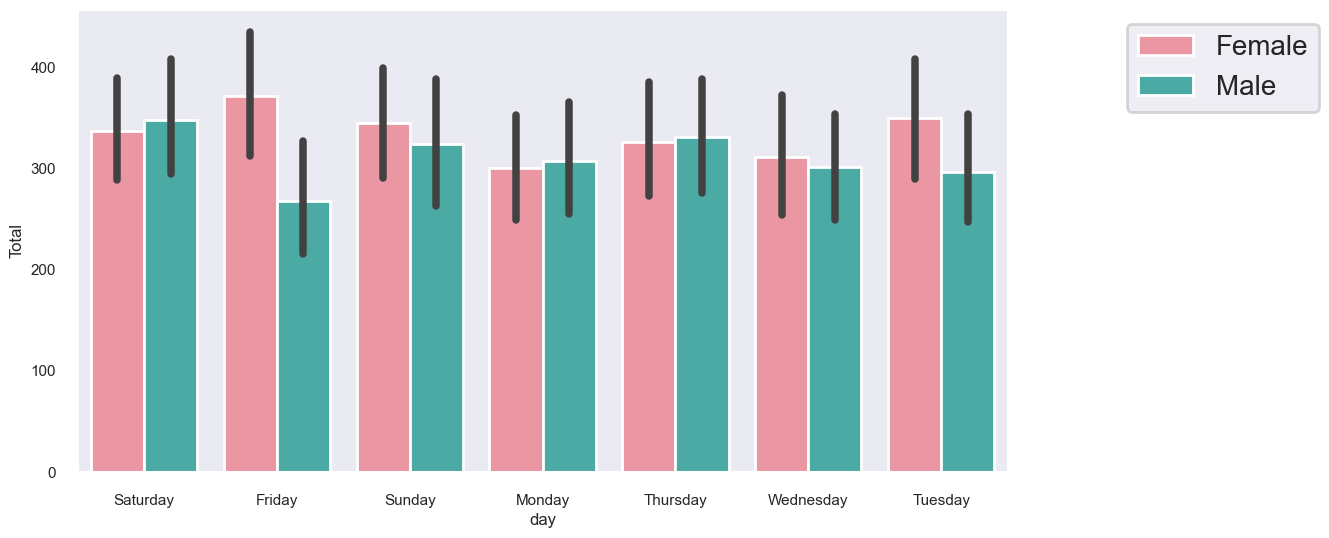

In [113]:
#Stacked bar 

import seaborn as sns
import matplotlib as mpl
sns.set_style("dark")

mpl.rcParams['font.size'] = 25
mpl.rcParams['axes.linewidth'] = 1.5

f,ax = plt.subplots(figsize=(12,6))

sns.barplot(x='day', y='Total', hue='Gender', data=sales_data, orient='v', ax=ax)

ax.legend(frameon=True, 
          loc= 1,
          bbox_to_anchor=(1.35, 1), 
          fontsize=20)



/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_40096/3431645105.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2 = sns.barplot(x="Branch", y="Total", data=male, estimator=sum, ci=None,  color='lightblue')


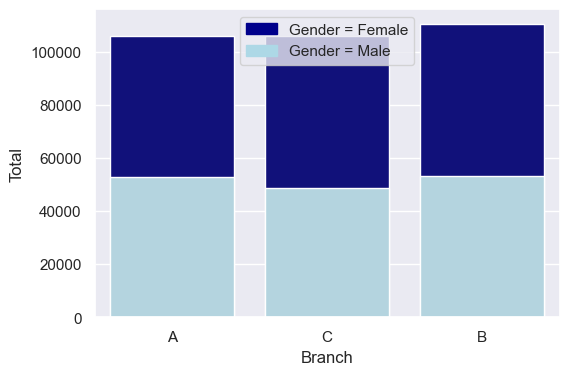

In [138]:
#Stacked bar 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(6, 4))

total_sales = sales_data.groupby('Branch')['Total'].sum().reset_index()

bar1 = sns.barplot(x="Branch",  y="Total", data=total_sales, color='darkblue')

male = sales_data[sales_data.Gender=='Male']

bar2 = sns.barplot(x="Branch", y="Total", data=male, estimator=sum, ci=None,  color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='Gender = Female')
bottom_bar = mpatches.Patch(color='lightblue', label='Gender = Male')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()



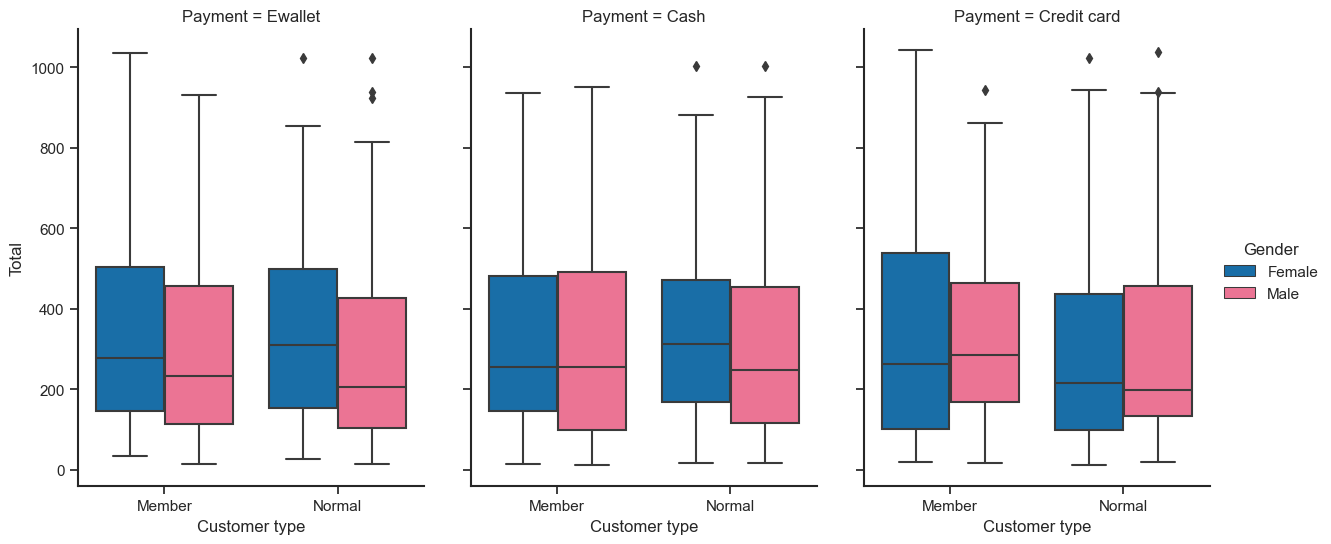

In [141]:
#Boxplot

import seaborn as sns

sns.set_style("ticks")

mpl.rcParams['font.size'] = 25
mpl.rcParams['axes.linewidth'] = 1.5

sns.catplot(x="Customer type", y="Total",
                hue="Gender", col="Payment",
                data=sales_data, kind="box",
                palette=["#0273BE","#FF608B"],
                height=6, aspect=.7)

(1.0, 24.0)

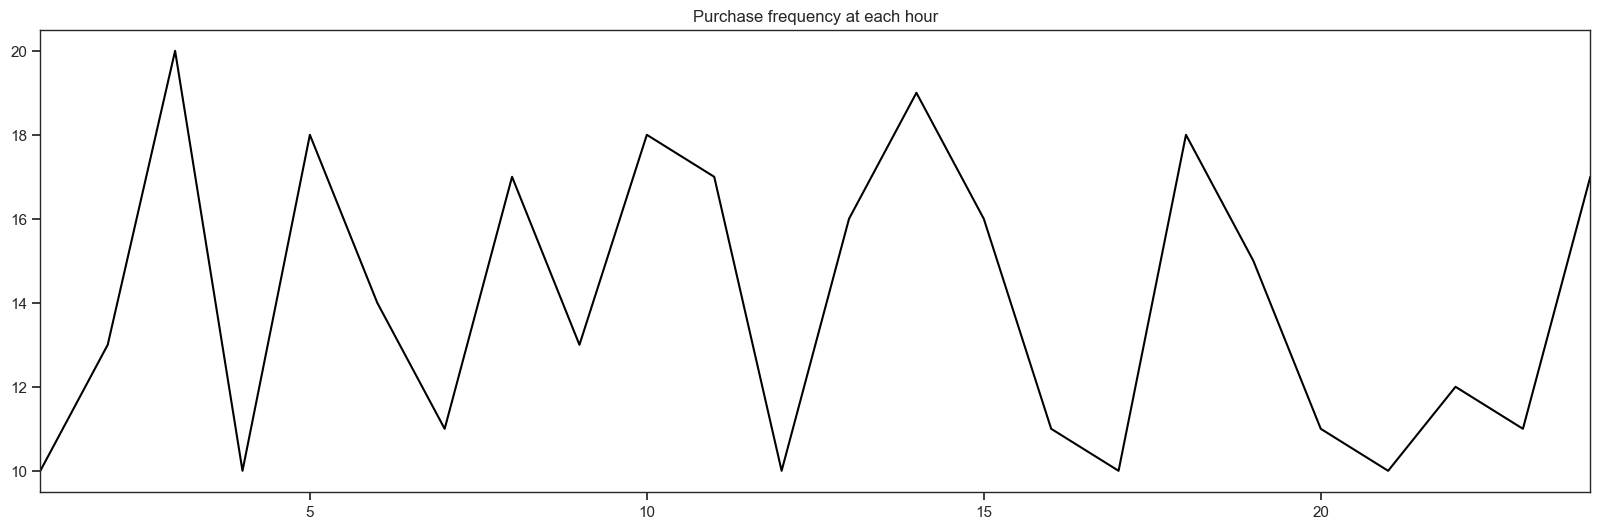

In [153]:
#Lineplot

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1

# Plot
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(sales_data['hour'], color="black")

ax.set_title('Purchase frequency at each hour')

ax.set_xlim((1, 24))



(1.0, 24.0)

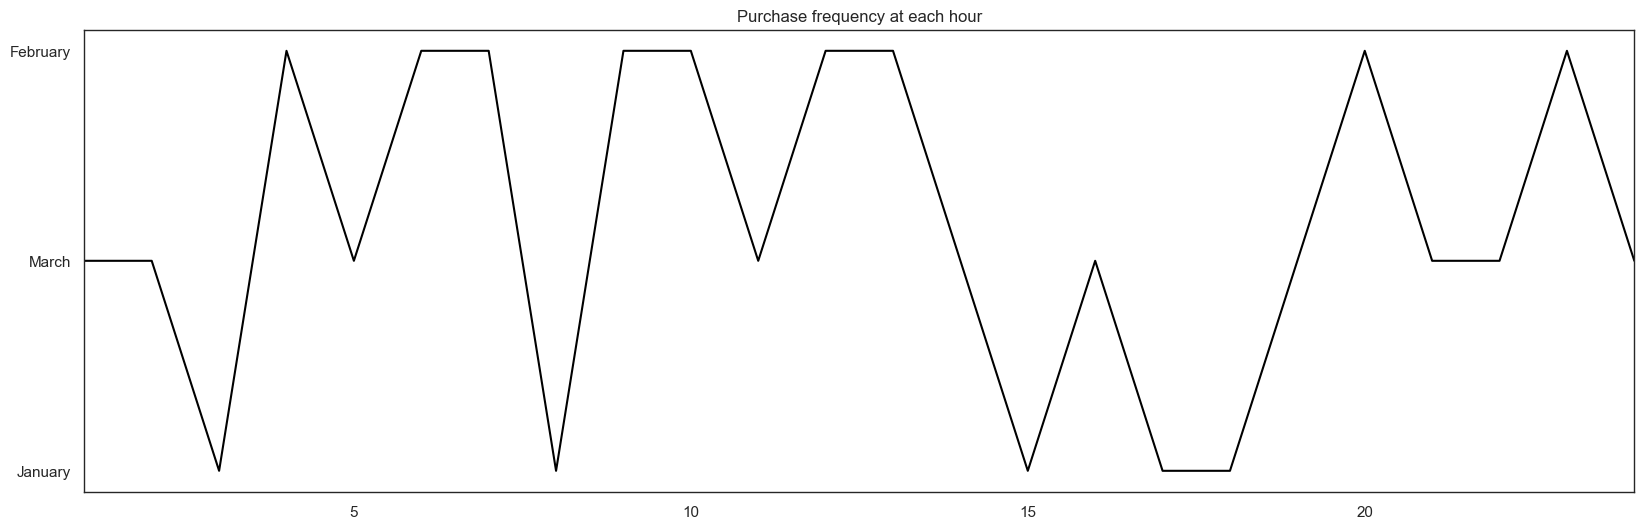

In [215]:
#Lineplot

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1

# Plot
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(sales_data['month'], color="black")

ax.set_title('Purchase frequency at each hour')

ax.set_xlim((1, 24))



In [145]:
sales_data['hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: hour, Length: 1000, dtype: int64

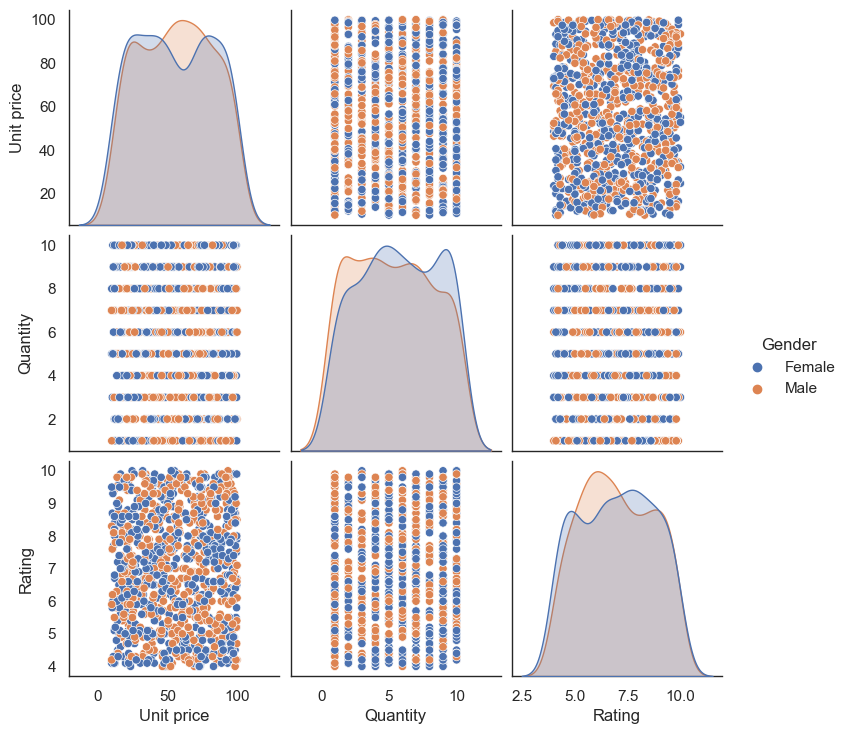

In [162]:
#Pairplot

import seaborn as sns
sns.set_style("white")
subset = sales_data.loc[:,['Unit price','Quantity','Rating','Gender']]
sns.pairplot(subset,hue="Gender")

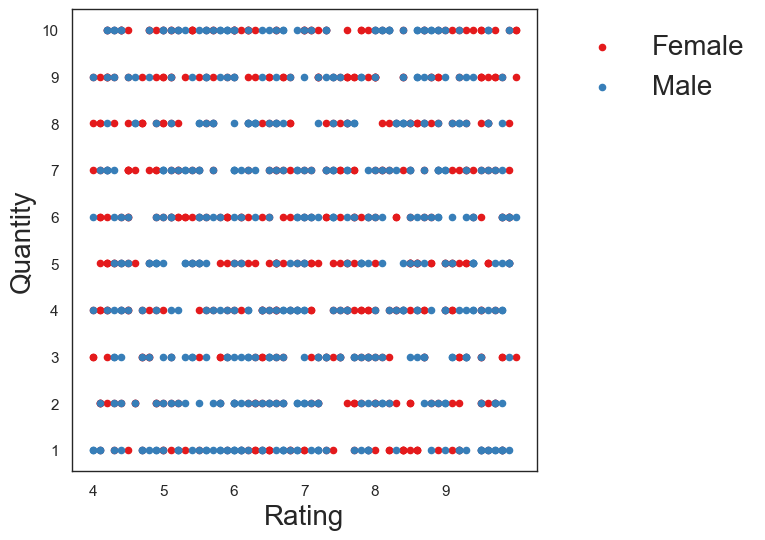

In [170]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.datasets import make_blobs
fig, ax = plt.subplots(figsize=(6, 6))
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1
cmap = plt.get_cmap('Set1')
colors = {}
index = 0
unique_categories = np.unique(sales_data['Gender'])
for category in unique_categories:
    colors[category] = cmap(index)
    index += 1  
groups = sales_data.groupby('Gender')
for name, group in groups:
    group.plot(ax=ax, kind='scatter', x='Rating', y='Quantity', 
               label=name,
               s=20,
               color=colors[name])
ax.set_xticks([ 4, 5, 6, 7, 8, 9])
ax.set_xticklabels([ 4, 5, 6, 7, 8, 9])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,10])
ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9,10])
ax.set_xlabel("Rating", fontsize=20)
ax.set_ylabel("Quantity", fontsize=20)
ax.legend(frameon=False, 
          loc= 1, 
          labels=unique_categories, 
          bbox_to_anchor=(1.5, 1), 
          fontsize=20)

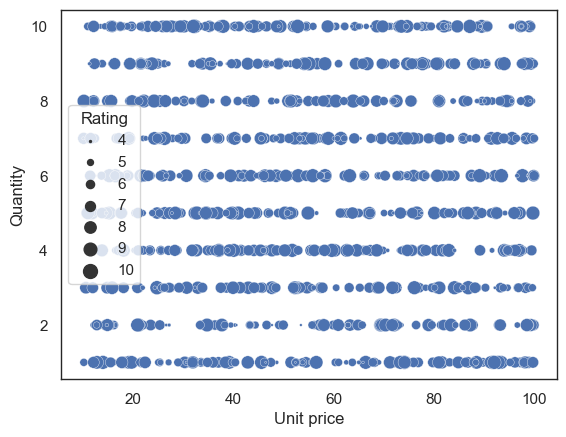

In [186]:
#bubble chart
import matplotlib.pyplot as plt
import seaborn as sns


# data
data = sales_data

# use the scatterplot function to build the bubble map
sns.scatterplot(data=sales_data, x="Unit price", y="Quantity", size="Rating", legend=True, sizes=(2,100))

# show the graph
plt.show()

/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_40096/2040238978.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_data.groupby(['Product line']).sum().plot(kind='pie', y='Total',figsize=[10,10])


<AxesSubplot: ylabel='Total'>

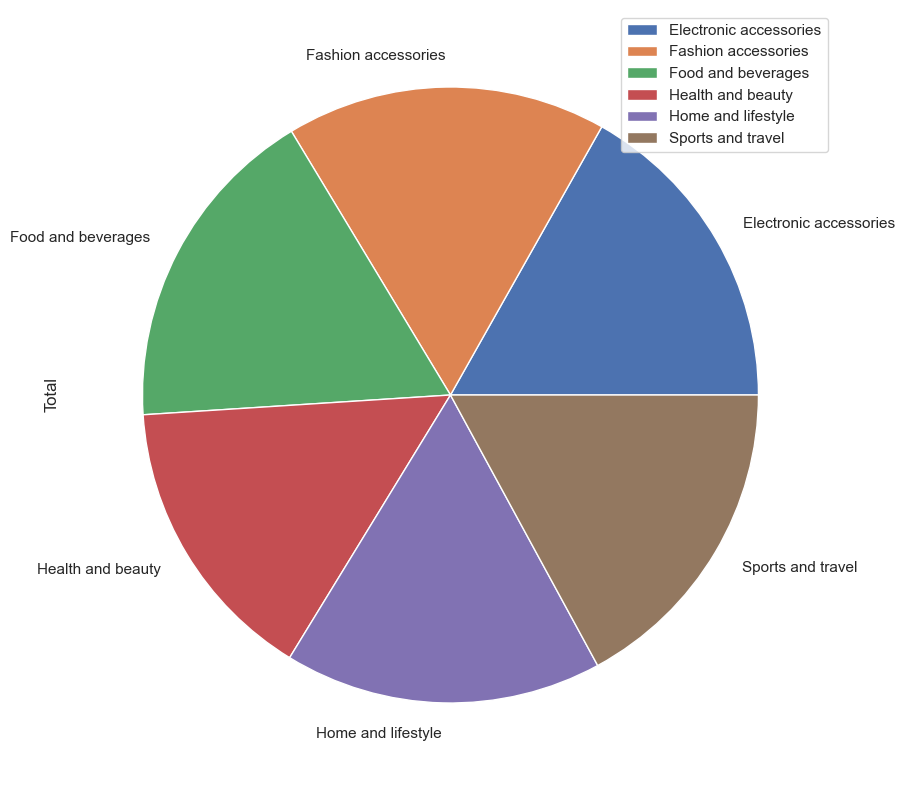

In [201]:
#Pie chart
import matplotlib.pyplot as plt
import numpy as np

sales_data.groupby(['Product line']).sum().plot(kind='pie', y='Total',figsize=[10,10])


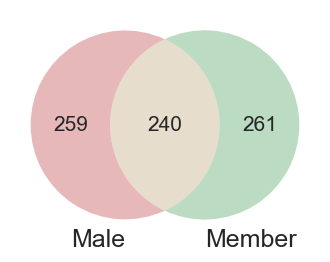

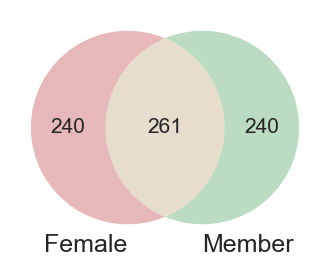

In [205]:
#Venn diagram
from matplotlib_venn import venn2


campaign_a = sales_data[(sales_data['Gender'] == 'Male')] 
campaign_b = sales_data[(sales_data['Customer type'] == 'Member')]

plt.figure(figsize=(4,4))
set1 = set(campaign_a['Invoice ID'])
set2 = set(campaign_b['Invoice ID'])

venn2([set1, set2], ('Male', 'Member'))
plt.show()

campaign_a = sales_data[(sales_data['Gender'] == 'Female')] 
campaign_b = sales_data[(sales_data['Customer type'] == 'Member')]

plt.figure(figsize=(4,4))
set1 = set(campaign_a['Invoice ID'])
set2 = set(campaign_b['Invoice ID'])

venn2([set1, set2], ('Female', 'Member'))
plt.show()

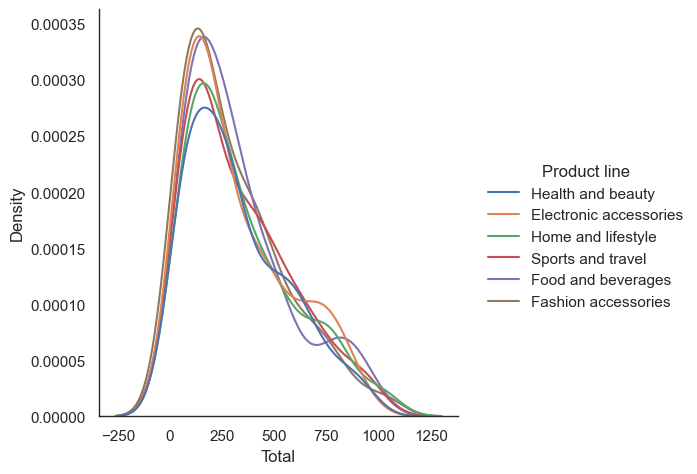

In [213]:
#Density plot
sns.displot(sales_data, x="Total", kind="kde",hue='Product line')